In [80]:
13.1

import numpy as np

compositions = []
# Iterating iron concentrations from 0 to 100% in 10% steps
for iron in np.arange(0, 1.1, 0.1):
  remaining = 1.0 - iron
    # Iterating rocks from 0 to the remaining amount in 10% steps
  for rock in np.arange(0, remaining + 0.01, 0.1):
        water = 1.0 - iron - rock
        compositions.append([iron, rock, water])

compositions = np.array(compositions)
print(f"Number of different planets: {len(compositions)}")

Number of different planets: 66


In [81]:
#13.2

M_earth = 5.972e24 #Kg
density_iron = 11000 #Kg/m^3
density_rock = 4500 #Kg/m^3
density_water = 1000 #Kg/m^3

# Finding mass fractions from our compositions array
m_iron = compositions[:, 0]
m_rock = compositions[:, 1]
m_water = compositions[:, 2]

# Calculating inverse density and then density
inv_density = (m_iron/density_iron) + (m_rock/density_rock) + (m_water/density_water)
density = 1 / inv_density

# Calculating radius in km
radius_m = ( (3 * M_earth) / (4 * np.pi * density) )**(1/3)
radius_km = radius_m / 1000

print(radius_km)

print(density)


[11254.95414453 10955.24911472 10638.18219984 10300.99691286
  9940.16186781  9551.03544097  9127.32060773  8660.12536598
  8136.21717553  7534.43715601  6817.20298247 10903.0039192
 10582.75178772 10241.84677506  9876.59785487  9482.1299001
  9051.78871243  8576.10392637  8040.83343205  7422.86299986
  6680.18946496 10526.7345443  10182.00540554  9812.20496496
  9412.20807717  8974.97479165  8490.40307284  7943.13138903
  7307.82987798  6537.31243772 10121.45224884  9746.95563631
  9341.23164959  8896.82301942  8402.93628237  7842.96482779
  7189.05655883  6387.90119424  9680.82081087  9269.15992892
  8817.27357561  8313.60967137  7740.17219103  7066.2233385
  6231.15315144  9195.94965536  8736.26224208  8222.32110625
  7634.57427947  6938.96441029  6066.09533067  8653.71994547
  8128.95917242  7525.97148916  6806.85819726  5891.5302673
  8033.40197362  7414.14047361  6669.41494713  5705.95797207
  7298.83007838  6526.06058684  5507.45970223  6376.11537191
  5293.51815154  5060.726124

In [85]:
#13.3

earth_radius = 6371 #Km

# Planets with radius smaller than Earth and non-zero water

smaller_radius_planets = radius_km < earth_radius
non_zero_water_planets = m_water > 0

condition_1 = smaller_radius_planets & non_zero_water_planets
smaller_radius_non_zero_water = np.sum(condition_1)

print(f"Number of planets with radius smaller than Earth and non-zero water: {smaller_radius_non_zero_water}")

# Planets with radius larger than Earth but zero water

larger_radius_planets = radius_km > earth_radius
zero_water_indices = m_water == 0

condition_2 = larger_radius_planets & zero_water_indices
larger_radius_zero_water = np.sum(condition_2)

print(f"Number of planets with radius larger than Earth but zero water: {larger_radius_zero_water}")

if larger_radius_zero_water > 0:
    print("\nCompositions of Iron, Rock, Water and Radii (km) for planets with larger radius than Earth but zero water:")
    print(np.column_stack((compositions[condition_2], radius_km[condition_2])))
else:
    print("\nNo planets found with radius larger than Earth but zero water")

Number of planets with radius smaller than Earth and non-zero water: 0
Number of planets with radius larger than Earth but zero water: 3

Compositions of Iron, Rock, Water and Radii (km) for planets with larger radius than Earth but zero water:
[[0.00000000e+00 1.00000000e+00 0.00000000e+00 6.81720298e+03]
 [1.00000000e-01 9.00000000e-01 0.00000000e+00 6.68018946e+03]
 [2.00000000e-01 8.00000000e-01 0.00000000e+00 6.53731244e+03]]


 From the results, we observe that the water, being the least dense material tends to increase the planet's radius. To be smaller than Earth, a planet would need to be significantly denser than Earth, which is hard to achieve with a significant amount of water. Our  Earth has a radius of 6371 km, and with water present will generally result in a larger radius unless there is a very high proportion of iron and rock to compensate, which isn't enough in our case to make  it below Earth's radius.

There are 3 planets with radius larger than Earth but zero water. These planets are likely to be dominated by rocks with lower density, with varying amounts of iron but no water. Since water is the lightest of the components, its absence means these planets are still denser than those with water. However, it is also possible that if they have  low enough iron content and  high enough rock content , their overall density can be low enough to make them larger than Earth, even without water. When we observe the values of the radius and m_water values in our code results, these three planets are the ones with zero water content and relatively lower iron/higher rock compositions that make their overall density below Earth's thereby resulting in a larger radius.

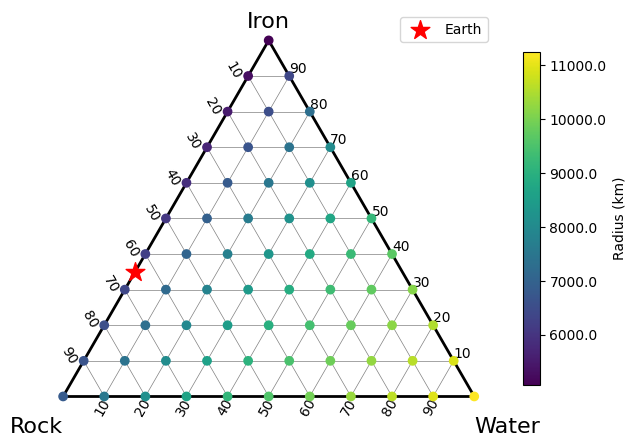

In [83]:
#13.4

!pip install ternary_diagram

from ternary_diagram import TernaryDiagram
import matplotlib.pyplot as plt

td = TernaryDiagram(['Iron', 'Rock', 'Water'])

# Scatter plot
im = td.scatter(compositions, c=radius_km, cmap='viridis', marker='o')
td.colorbar(im, label='Radius (km)')

# Adding Earth marker (0.35 iron, 0.65 rock, 0.0 water)
td.scatter([[0.35, 0.65, 0.0]], marker='*', color='r', s=200, label='Earth')

plt.legend()
plt.savefig('planet_ternary.png')
plt.show()